<a href="https://colab.research.google.com/github/treasurehub23/malaria-detection/blob/main/malaria-cnn-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub


path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cell-images-for-detecting-malaria' dataset.
Path to dataset files: /kaggle/input/cell-images-for-detecting-malaria


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os

In [5]:
import shutil
destination = "/content/cell_images"
if not os.path.exists(destination):
    shutil.copytree(path, destination)

In [6]:
import os
import shutil

destination = "/content/cell_images"

def flatten_nested_cell_images(path):
    """Recursively flatten any nested 'cell_images' folders."""
    while True:
        nested = os.path.join(path, "cell_images")
        if os.path.exists(nested):
            print(f"🔧 Found nested folder: {nested}")


            for item in os.listdir(nested):
                src = os.path.join(nested, item)
                dst = os.path.join(path, item)

                if not os.path.exists(dst):
                    shutil.move(src, dst)
                elif os.path.isdir(src):

                    for file in os.listdir(src):
                        file_src = os.path.join(src, file)
                        file_dst = os.path.join(dst, file)
                        if not os.path.exists(file_dst):
                            shutil.move(file_src, file_dst)

                    shutil.rmtree(src, ignore_errors=True)


            shutil.rmtree(nested, ignore_errors=True)
            print(f"✅ Removed nested folder: {nested}")
        else:
            break


if os.path.exists(destination):
    flatten_nested_cell_images(destination)
    print("\n All nested 'cell_images' folders flattened successfully!")
else:
    print(" Destination folder does not exist.")





🔧 Found nested folder: /content/cell_images/cell_images
✅ Removed nested folder: /content/cell_images/cell_images

🎉 All nested 'cell_images' folders flattened successfully!

📂 Final folder structure:
cell_images/
  Parasitized/
    C172P133ThinF_IMG_20151119_155307_cell_255.png
    C89P50ThinF_IMG_20150820_162153_cell_187.png
    C60P21thinF_IMG_20150804_104919_cell_132.png
  Uninfected/
    C144P105ThinF_IMG_20151015_160529_cell_122.png
    C120P81ThinF_IMG_20151002_125443_cell_42.png
    C4thin_original_IMG_20150608_165620_cell_39.png


In [7]:

print(os.listdir(destination))

['Parasitized', 'Uninfected']


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    destination, validation_split = 0.2, subset ="training", labels="inferred", label_mode = "int", class_names=['Parasitized', 'Uninfected'], seed = 123, image_size = (64, 64), batch_size = 32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    destination, validation_split = 0.2, subset ="validation", seed = 123, image_size = (64, 64), batch_size = 32)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)
para = os.path.join(destination, "Parasitized")
un = os.path.join(destination, "Uninfected")

['Parasitized', 'Uninfected']


In [10]:
print("Parasitized:",len(os.listdir(para)))
print("Uninfected:",len(os.listdir(un)))

Parasitized: 13780
Uninfected: 13780


In [11]:
for images, labels in train_ds.take(1):
  print("Images batch shape", images.shape)
  print("Labels bat shape: ", labels.shape)
  print(set(labels.numpy()))

Images batch shape (32, 64, 64, 3)
Labels bat shape:  (32,)
{np.int32(0), np.int32(1)}


In [12]:

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))



In [20]:
test_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64,3)),
    tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])
test_model.compile(optimizer="adam", loss= "binary_crossentropy", metrics=["accuracy"] )
history = test_model.fit(train_ds, epochs = 10, validation_data=val_ds)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 88s 126ms/step - accuracy: 0.6220 - loss: 0.6437 - val_accuracy: 0.7233 - val_loss: 0.5664
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.7513 - loss: 0.5293 - val_accuracy: 0.8784 - val_loss: 0.3424
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 84s 122ms/step - accuracy: 0.9006 - loss: 0.2981 - val_accuracy: 0.9165 - val_loss: 0.2087
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 141s 121ms/step - accuracy: 0.9328 - loss: 0.2032 - val_accuracy: 0.9369 - val_loss: 0.1736
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 141s 120ms/step - accuracy: 0.9419 - loss: 0.1756 - val_accuracy: 0.9432 - val_loss: 0.1551
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 144s 122ms/step - accuracy: 0.9456 - loss: 0.1585 - val_accuracy: 0.9437 - val_loss: 0.1504
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 86s 125ms/step - accuracy: 0.9484 - loss: 0.1513 - val_accuracy: 0.9454 - val_loss: 0.1467
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 142s 124ms/step - accuracy: 0.9507 - los

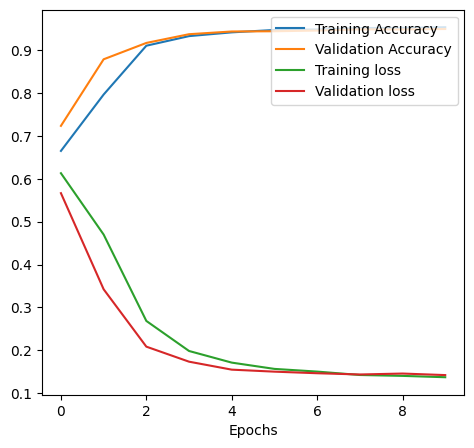

In [22]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc= "lower right")

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Training loss")
plt.plot(epochs_range, val_loss, label="Validation loss")
plt.legend(loc= "upper right")

plt.xlabel("Epochs")

plt.show()